In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [43]:
df = pd.read_csv("logistic.csv")
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [44]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [45]:
#handle numvalues:

handle = df['status'].median()
handle

0.0

In [46]:
df.status = df.status.fillna(handle)
df.isnull().sum()

age       0
status    0
dtype: int64

In [65]:
#sepatare x & y:
x= df[['age']]
y= df[['status']]

In [49]:
#separate for training & testing:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= .30, random_state=1)

In [50]:
#import model:
model = LogisticRegression()

In [51]:
#training dataset:
model.fit(xtrain, ytrain)

c:\Users\h\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
predicted = model.predict(xtest)
predicted

array([1., 0., 0., 0., 0., 1.])

In [53]:
model.score(xtest,ytest)

0.8333333333333334

In [54]:
model.predict_proba(xtest)

array([[0.28697051, 0.71302949],
       [0.9902967 , 0.0097033 ],
       [0.80161052, 0.19838948],
       [0.50311753, 0.49688247],
       [0.71810555, 0.28189445],
       [0.02465085, 0.97534915]])

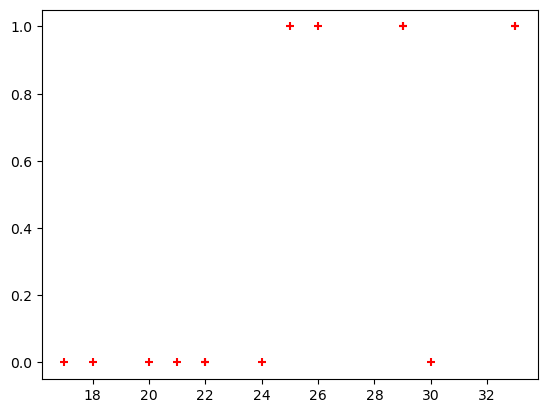

In [55]:
plt.scatter(xtrain, ytrain,marker='+', color = 'red')
plt.show()

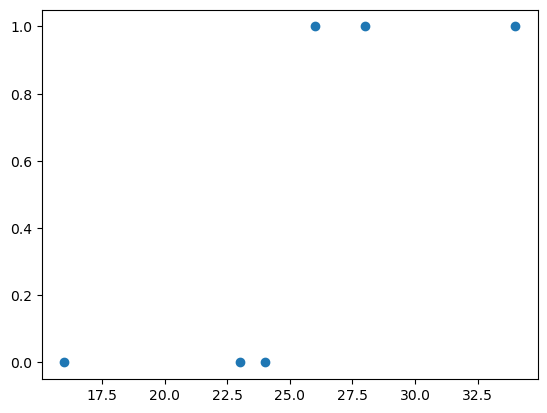

In [56]:
plt.scatter(xtest, ytest)

In [64]:
#visualization with confusion matrix:

cm = confusion_matrix(predicted, ytest)
cm

array([[3, 1],
       [0, 2]], dtype=int64)

<AxesSubplot:>

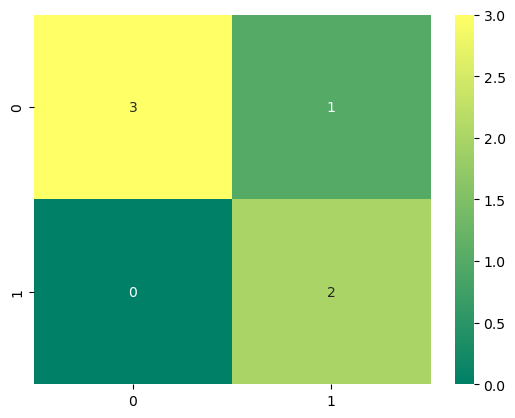

In [63]:
sns.heatmap(cm,annot=True, cmap='summer')